<a href="https://colab.research.google.com/github/ParkEunbin/ML_basic/blob/main/210128_Conv2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Conv2d

###이미지에 원이 어디에,몇개있는가 (특징), 특정한 패턴의 특징이 어디서 나타나는지를 확인하는 도구 = "Convolution"

- 필터를 가지고, 특징을 뽑아냄> 2차원 형태의 숫자집합(이미지로 표현가능) = feature map(특징맵)
- 필터 하나가 이미지 한장을 만듬

##결정할것
- 필터셋을 몇 개 사용할 것인가 (ex,3개 > 3개의 특징맵=3채널의 특징맵)
- 필터 셋의 사이즈를 얼마로 할 것인가(kernel_size)
- 결과로 나온 특징맵을 Flatten을 통해 한 줄로 펼친 후 표로 만듬
- 입력의 형태 : 3차원 형태의 관측치를 받음 [28,28,1] >>흑백이미지를 3차원으로 reshape하는 부분이 필요

##필터
- 필터셋은 3차원 형태로 된 가중치의 모음(컴터가 컨볼루션layer에서 학습하는 것은 필터다.)
- 필터셋 하나는 앞선 레이어의 결과인 '특징맵' 전체를 본다.
- 필터셋 개수 만큼 특징맵을 만든다.
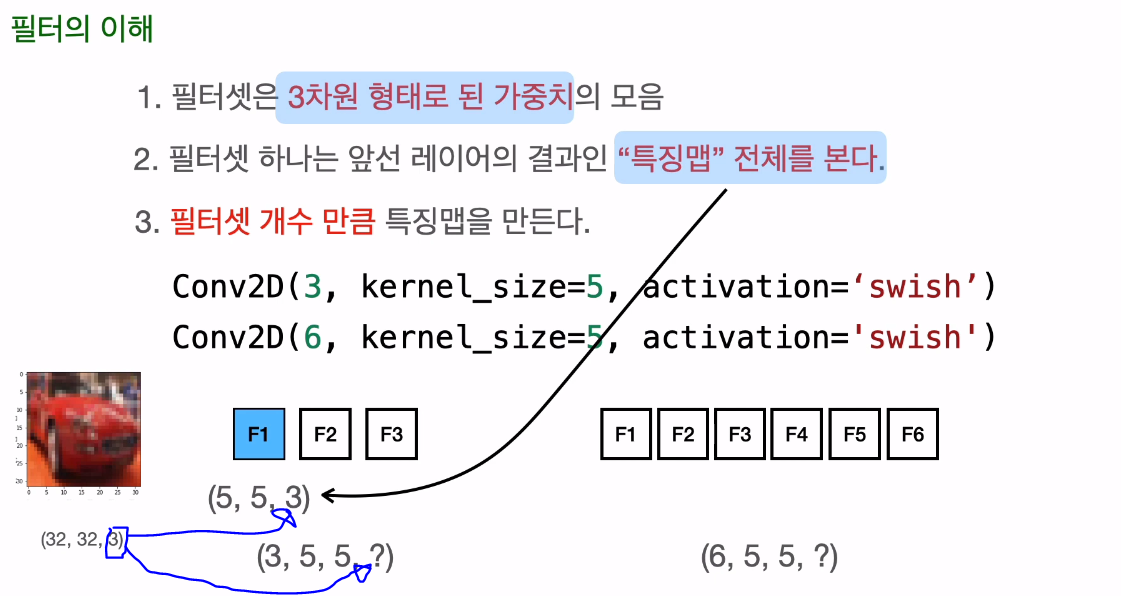





- 흑백 > 채널이 1개
- 컬러 > 채널이 3개
- 필터를 지나면 '필터의 사이즈-1'만큼 사이즈가 줄어듬
- 컨볼루션 필터 6개 = 컴퓨터야 이미지들이 어느 숫자인지 판단하기 위해 가장 좋은 특징맵 6개를 찾아줘! 
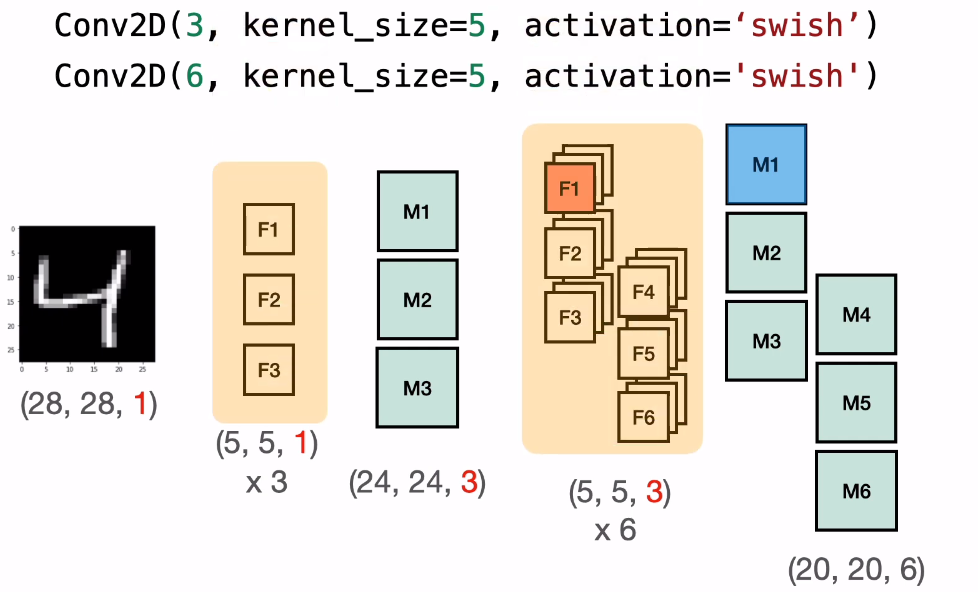

## Convolution 연산
- 원본 이미지(8,8,1) , 필터(3,3,1) > 결과(6,6)이미지 1개
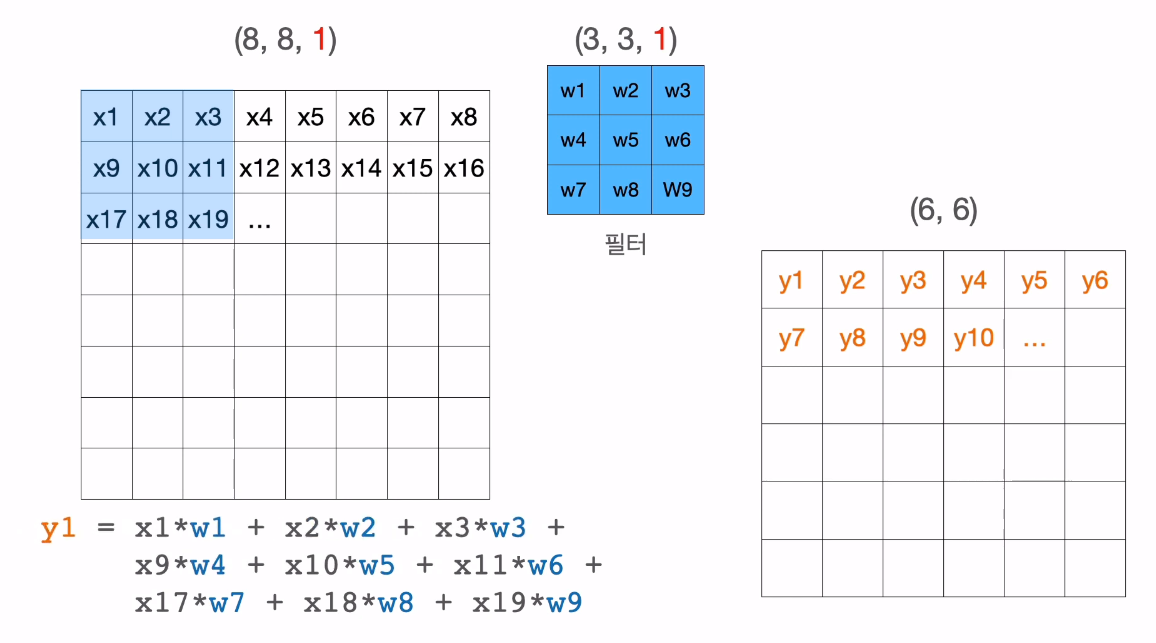

예시 ) 4의 이미지, 가로필터
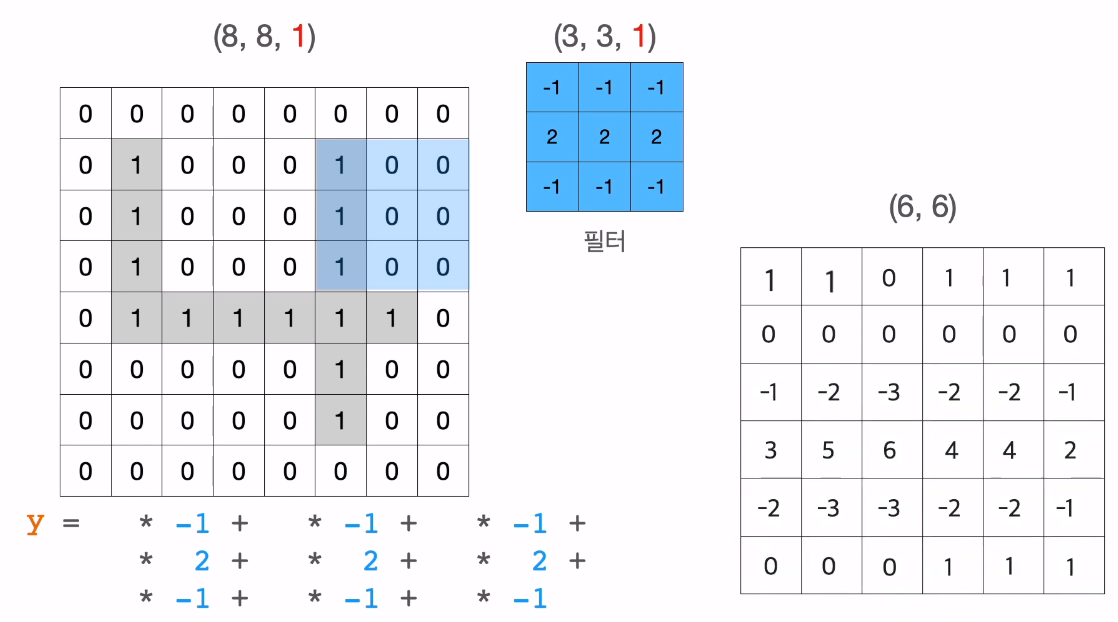

### 실제로 컴퓨터에서는 이미지의 특성을 가장 잘 나타낼 수 있는 필터를 생성하게 되는 것

In [2]:
import tensorflow as tf
import pandas as pd

In [4]:
# 1. 데이터 가져오기
(독립,종속),_=tf.keras.datasets.mnist.load_data()
print(독립.shape,종속.shape)

#conv에서는 3차원 형태여야함
독립 = 독립.reshape(60000,28,28,1)
#원핫인코딩
종속 = pd.get_dummies(종속)
print(독립.shape,종속.shape)

(60000, 28, 28) (60000,)
(60000, 28, 28, 1) (60000, 10)


In [7]:
# 2. 모델 만들기
X= tf.keras.layers.Input(shape=[28,28,1])
H= tf.keras.layers.Conv2D(3, kernel_size=5, activation='swish')(X) 
H= tf.keras.layers.Conv2D(6, kernel_size=5, activation='swish')(H)
#여기까지 결과가 이미지 형태로 나옴> 표형태로 바꿔주기
H=tf.keras.layers.Flatten()(H)
H=tf.keras.layers.Dense(84,activation='swish')(H)
Y=tf.keras.layers.Dense(10,activation='softmax')(H)
model=tf.keras.models.Model(X,Y)
model.compile(loss='categorical_crossentropy',metrics='accuracy')

In [9]:
# 3. 모델 학습시키기
model.fit(독립,종속,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 3ms/step - loss: 3.3820 - accuracy: 0.8619
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0927 - accuracy: 0.9749
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0513 - accuracy: 0.9853
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0363 - accuracy: 0.9900
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0250 - accuracy: 0.9928
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0236 - accuracy: 0.9935
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0195 - accuracy: 0.9948
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0170 - accuracy: 0.9955
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0161 - accuracy: 0.9951
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.01

In [10]:
# 4. 모델 이용하기
pred=model.predict(독립[0:5])
pd.DataFrame(pred).round(2)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
종속[0:5]

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


In [12]:
# 학습하는 parameter가 많이 늘어남
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 3)         78        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 20, 6)         456       
_________________________________________________________________
flatten_2 (Flatten)          (None, 2400)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 84)                201684    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                850       
Total params: 203,068
Trainable params: 203,068
Non-trainable params: 0
_______________________________________________________